In [16]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from importlib import reload
import loss
import data_generator
import model
import train
import visualize
reload(loss)
reload(visualize)
reload(model)
reload(data_generator)
reload(train)

from data_generator import make_dataloaders
from model import MainModel
from train import train_model, load_model

In [8]:
COLOR_SPACE = 'HSL' # Lab or HSL
path = "./data/part3"
model_path = "./models/model.pt"
paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names
np.random.seed(123)
paths_subset = np.random.choice(paths, 1000, replace=False) # choosing 1000 images randomly
rand_idxs = np.random.permutation(1000)
train_idxs = rand_idxs[:800] # choosing the first 8000 as training set
val_idxs = rand_idxs[800:] # choosing last 2000 as validation set
train_paths = paths_subset[train_idxs]
val_paths = paths_subset[val_idxs]
print(len(train_paths), len(val_paths))

800 200


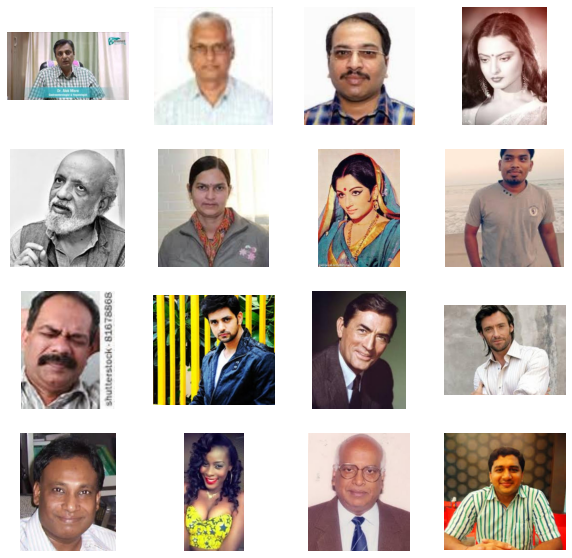

In [9]:
_, axes = plt.subplots(4, 4, figsize=(10, 10))
for ax, img_path in zip(axes.flatten(), train_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

In [10]:
train_dl = make_dataloaders(paths=train_paths, split='train', color_space=COLOR_SPACE)
val_dl = make_dataloaders(paths=val_paths, split='val', color_space=COLOR_SPACE)

data = next(iter(train_dl))
known_channels, unknown_channels_ = data['known_channel'], data['unknown_channels']
print(known_channels.shape, unknown_channels_.shape)
print(len(train_dl), len(val_dl))

torch.Size([16, 1, 256, 256]) torch.Size([16, 2, 256, 256])
50 13


C:\Users\Tomek\AppData\Roaming\Python\Python39\site-packages\torchvision\transforms\transforms.py:257: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


model initialized with norm initialization
model initialized with norm initialization


  0%|          | 0/50 [00:00<?, ?it/s]


Epoch 1/1
Iteration 10/50
loss_D_fake: 0.87536
loss_D_real: 0.84009
loss_D: 0.85772
loss_G_GAN: 1.03112
loss_G_L1: 57.50777
loss_G: 58.53889


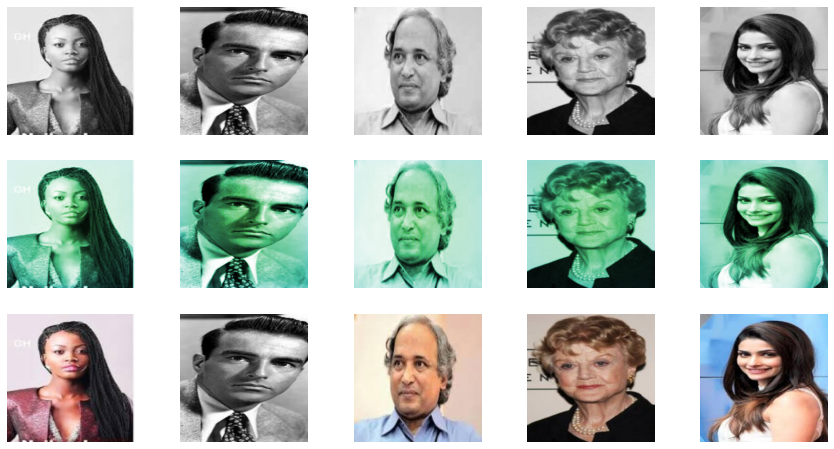

KeyboardInterrupt: 

In [17]:
model = MainModel()
train_model(model, train_dl, val_dl, COLOR_SPACE, 1, 10, save_path = model_path)

In [ ]:
# load model from file and train it again
loaded_model = MainModel()
_, loss_meter_dict = load_model(model_path, loaded_model)
train_model(model, train_dl, val_dl, COLOR_SPACE, 1, 10, save_path = model_path, loss_meter_dict = loss_meter_dict)